<a href="https://colab.research.google.com/github/deepasrii/Animal-Classification-using-Deep-Learning/blob/main/Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  A multiclass image classifier

## __Purpose:__ Can be used to classify  species of animal

### Use transfer learning and vgg16 model

### importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np  
import itertools
from tensorflow import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dropout, Flatten, Dense  
from tensorflow.keras import applications  
from keras.utils.np_utils import to_categorical 
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading up our image datasets

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = 'data/train'  
validation_data_dir = 'data/validation'  
test_data_dir = 'data/test'
   
# number of epochs to train top model  
epochs = 50 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 32

In [ ]:
#Loading vgg16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet') 

In [ ]:
vgg16.save('vgg16.h5')

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files

# Creation of weights/features with VGG16

In [ ]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 13412 images belonging to 6 classes.


/home/codiis/.local/lib/python3.8/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
2021-11-03 10:21:04.694847: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1345921024 exceeds 10% of free system memory.


Time:  0:36:38.200641


In [ ]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 2549 images belonging to 6 classes.
Time:  0:06:54.731226


In [ ]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1845 images belonging to 6 classes.
Time:  0:04:51.942310


# Loading training, validation and testing data

In [ ]:
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 13412 images belonging to 6 classes.


In [ ]:
#import pickle
#generator_top.to_pickle('./generator_top.pkl')

In [ ]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 2549 images belonging to 6 classes.


In [ ]:
#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 1845 images belonging to 6 classes.


In [ ]:
train_data.shape

(13412, 7, 7, 512)

# Training of model

In [ ]:
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=50,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

/home/codiis/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
420/420 [==============================] - 16s 37ms/step - loss: 0.7099 - acc: 0.7508 - val_loss: 0.3602 - val_acc: 0.8752
Epoch 2/50
420/420 [==============================] - 12s 28ms/step - loss: 0.4129 - acc: 0.8629 - val_loss: 0.3260 - val_acc: 0.8886
Epoch 3/50
420/420 [==============================] - 11s 27ms/step - loss: 0.3241 - acc: 0.8895 - val_loss: 0.3014 - val_acc: 0.9039
Epoch 4/50
420/420 [==============================] - 11s 27ms/step - loss: 0.2808 - acc: 0.9078 - val_loss: 0.3099 - val_acc: 0.8925
Epoch 5/50
420/420 [==============================] - 11s 27ms/step - loss: 0.2408 - acc: 0.9211 - val_loss: 0.2700 - val_acc: 0.9133
Epoch 6/50
420/420 [==============================] - 11s 27ms/step - loss: 0.2131 - acc: 0.9303 - val_loss: 0.2666 - val_acc: 0.9164
Epoch 7/50
420/420 [==============================] - 12s 27ms/step - loss: 0.1906 - acc: 0.9362 - val_loss: 0.3098 - val_acc: 0.9062
Epoch 8/50
420/420 [==============================] - 12s 28ms

2021-11-03 10:33:31.739505: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1345921024 exceeds 10% of free system memory.


In [ ]:
#Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2508900   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 306       
Total params: 2,514,256
Trainable params: 2,514,256
Non-trainable params: 0
____________________________________________

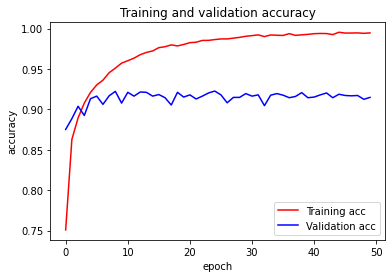

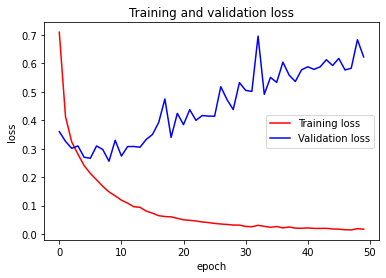

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

## Model Evaluation on Testing Set

In [ ]:
model.evaluate(test_data, test_labels)

58/58 [==============================] - 0s 5ms/step - loss: 0.5255 - acc: 0.9285


[0.5255447030067444, 0.9284552931785583]

## Classification metrics and Confusion Matrix

### Classification Metrics

In [ ]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0)
#preds = np.argmax(preds, axis=1)
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)
#preds[90:118]

test data [[[[1.59661144e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.54971445e-01 0.00000000e+00]
   [9.25383940e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.20073438e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.85158443e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.90490675e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.19419199e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.66731334e-01 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.70549607e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 2.11467415e-01 ... 0.00000000e+00
    3.43592465e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 6.56662881e-01 ... 0.00000000e+00
    1.32428706e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 4.17726696e-0

rounded test_labels [[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


In [ ]:
animals = ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

              precision    recall  f1-score   support

 butterflies       0.99      0.89      0.93       371
    chickens       0.92      0.90      0.91       203
   elephants       0.90      0.90      0.90       152
      horses       0.97      0.95      0.96       472
     spiders       0.88      0.97      0.92       403
   squirells       0.91      0.92      0.91       244

   micro avg       0.93      0.93      0.93      1845
   macro avg       0.93      0.92      0.92      1845
weighted avg       0.93      0.93      0.93      1845
 samples avg       0.93      0.93      0.93      1845



/home/codiis/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [ ]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


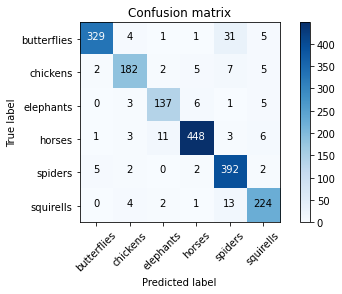

In [ ]:
plot_confusion_matrix(confusion_matrix, ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells'])

Normalized confusion matrix


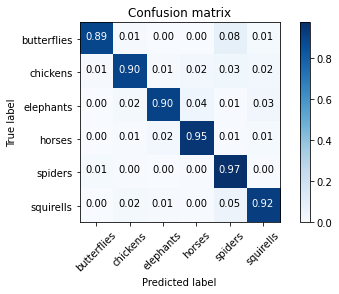

In [ ]:
#Those numbers are all over the place. Now turning normalize= True
plot_confusion_matrix(confusion_matrix, 
                      ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells'],
                     normalize=True)

In [ ]:
model.save('model.h5')

## Testing images on model

In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [ ]:
vgg16 = load_model("vgg16.h5")
model=load_model('model.h5')
def test_single_image(path):
    animals = ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict(bt_prediction)
    for idx, animal, x in zip(range(0,6), animals , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict(bt_prediction)
    #print(class_predicted)
    class_dictionary = generator_top.class_indices
    #print(type(class_dictionary))
    inv_map = {v:k for k,v in class_dictionary.items()}
    #print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]])) 
    x = np.argmax(class_predicted)

    #print(inv_map)
    print(class_dictionary)
    print(f'{x} : {inv_map[x]}')
    return load_img(path)

In [ ]:
path = 'data/test/wildlifeelephant.jpg'

[INFO] loading and preprocessing image...
ID: 0, Label: butterflies 0.01%
ID: 1, Label: chickens 0.0%
ID: 2, Label: elephants 97.77%
ID: 3, Label: horses 1.69%
ID: 4, Label: spiders 0.04%
ID: 5, Label: squirells 0.5%
Final Decision:
.
..
...
{'butterflies': 0, 'chickens': 1, 'elephants': 2, 'horses': 3, 'spiders': 4, 'squirells': 5}
2 : elephants


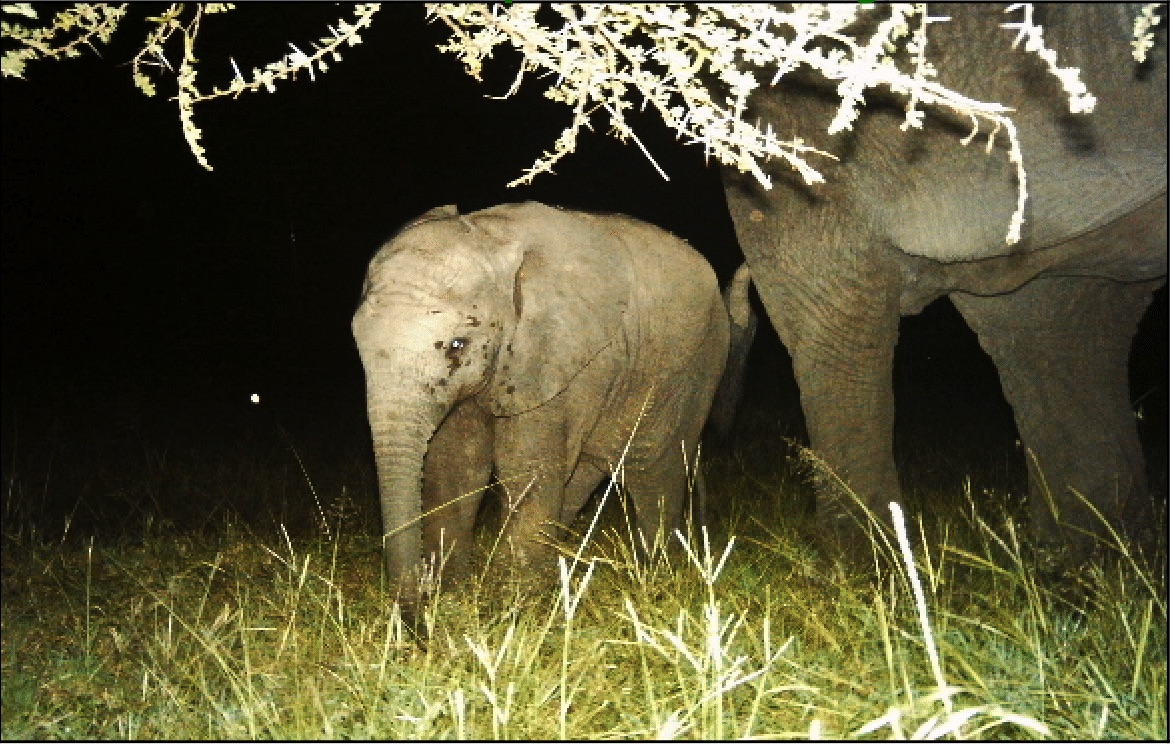

In [ ]:
test_single_image(path)


In [ ]:
path = 'data/test/butterfly.jpg'

[INFO] loading and preprocessing image...
ID: 0, Label: butterflies 100.0%
ID: 1, Label: chickens 0.0%
ID: 2, Label: elephants 0.0%
ID: 3, Label: horses 0.0%
ID: 4, Label: spiders 0.0%
ID: 5, Label: squirells 0.0%
Final Decision:
.
..
...
{'butterflies': 0, 'chickens': 1, 'elephants': 2, 'horses': 3, 'spiders': 4, 'squirells': 5}
0 : butterflies


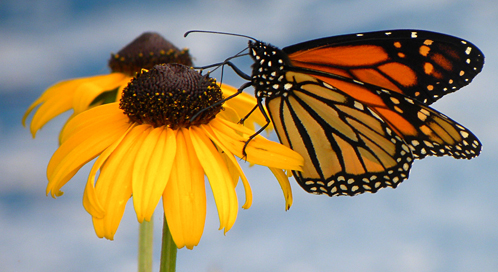

In [ ]:
test_single_image(path)

In [ ]:
path = 'data/test/SquirrelWeb.jpeg'

[INFO] loading and preprocessing image...
ID: 0, Label: butterflies 0.0%
ID: 1, Label: chickens 0.0%
ID: 2, Label: elephants 0.0%
ID: 3, Label: horses 0.0%
ID: 4, Label: spiders 0.0%
ID: 5, Label: squirells 100.0%
Final Decision:
.
..
...
{'butterflies': 0, 'chickens': 1, 'elephants': 2, 'horses': 3, 'spiders': 4, 'squirells': 5}
5 : squirells


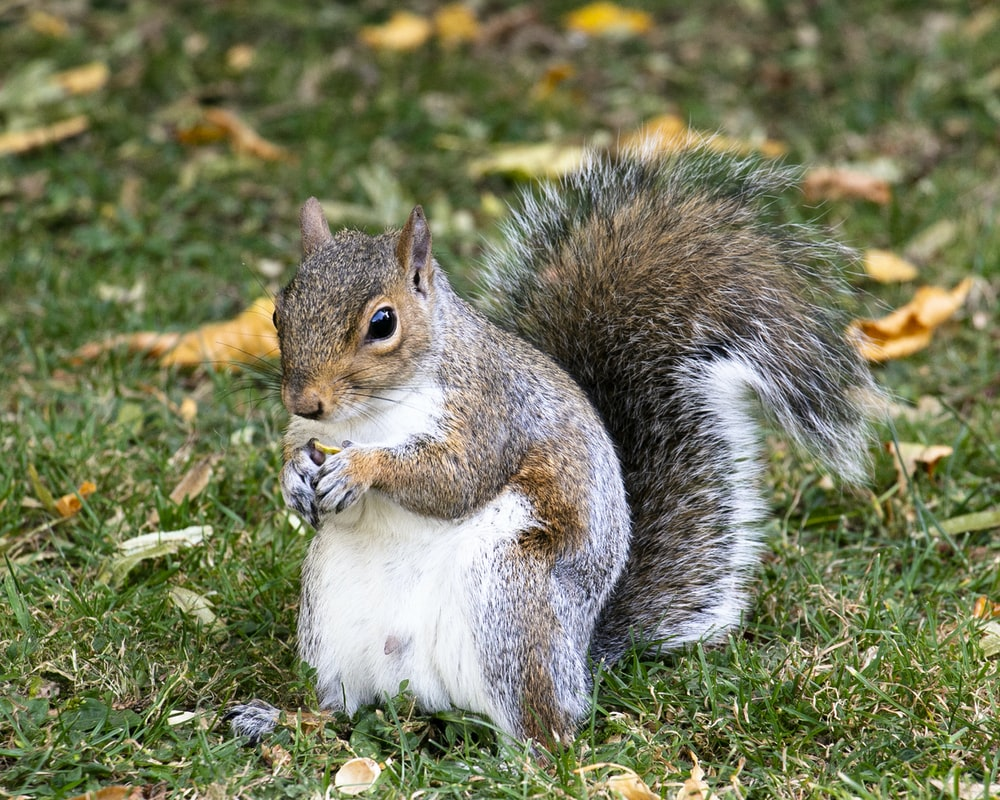

In [ ]:
test_single_image(path)